# Exploration of Projection Spaces

In [2]:
# Feel free to add dependencies, but make sure that they are included in environment.yml

#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#import altair as alt
#from altair import datum
#alt.data_transformers.disable_max_rows()

from sklearn import manifold
from sklearn.decomposition import PCA
from openTSNE import TSNE
#from openTSNE.callbacks import ErrorLogger
from umap import UMAP

/Users/markus/opt/miniconda3/envs/xai_proj_space/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data
To be able to explore paths in a projected space, you need to pick a problem/algorithm/model that consists of multiple states that change iteratively.

### Read and Prepare Data
Read in your data from a file or create your own data.

Document any data processing steps.

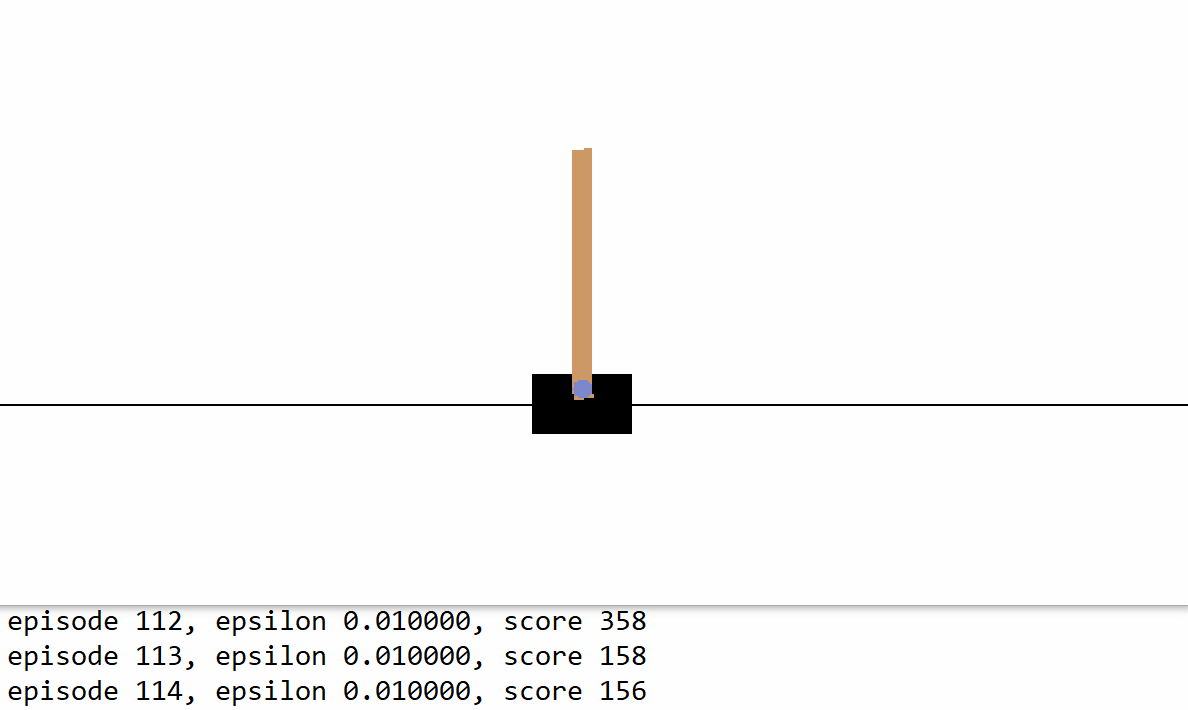

In [1]:
from IPython.display import display, Image

# Specify the path to your GIF file
gif_path = 'cartpole.gif'

# Display the GIF
display(Image(filename=gif_path))

### CartPole Dataset Description

The dataset contains information about the CartPole environment from the OpenAI Gym trained with Deep Q-Network. Each row represents a state at a given time step, and the columns provide the following information:

- **Column 0:** Time step
- **Column 1:** Action taken at the time step
- **Column 2:** Cart position
- **Column 3:** Cart velocity
- **Column 4:** Pole angle
- **Column 5:** Pole angular velocity


In [15]:
data = pd.read_csv('data/cartpole_500_episodes_dqn.csv')
data.head()

,0,1,2,3,4,5
0,0.0,0.0,0.032045,-0.024308,-0.027468,0.011308
1,0.0,1.0,0.031559,-0.219026,-0.027242,0.295200
2,0.0,2.0,0.027178,-0.413749,-0.021338,0.579168
3,0.0,3.0,0.018903,-0.608565,-0.009754,0.865054
4,0.0,4.0,0.006732,-0.413312,0.007547,0.569320


In [16]:
data[data["0"].isin([0, 50, 200, 300, 400, 480])]

,0,1,2,3,4,5
0,0.0,0.0,0.032045,-0.024308,-0.027468,0.011308
1,0.0,1.0,0.031559,-0.219026,-0.027242,0.295200
2,0.0,2.0,0.027178,-0.413749,-0.021338,0.579168
3,0.0,3.0,0.018903,-0.608565,-0.009754,0.865054
4,0.0,4.0,0.006732,-0.413312,0.007547,0.569320
...,...,...,...,...,...,...
48615,480.0,393.0,-2.264621,-1.587204,-0.134428,-0.073839
48616,480.0,394.0,-2.296365,-1.390436,-0.135905,-0.405730
48617,480.0,395.0,-2.324174,-1.583396,-0.144020,-0.158793
48618,480.0,396.0,-2.355842,-1.386537,-0.147196,-0.493220


In [17]:
# Get the numbers of specified episodes
episodes_to_include = [0, 50, 200, 300, 400, 480]
# Filter the data to only include the specified episodes
filtered_data = data[data["0"].isin(episodes_to_include)]

# Convert the filtered data to a NumPy array
data = np.array(filtered_data)
print(data.shape)

(835, 6)


### Comments
- Did you transform, clean, or extend the data?  How/Why?

To reduce the dataset we only used 6 episodes from the 500 training episodes.
In the chart below you can see the sequence length at each episode from the training, the longer the sequence the better.
We chose this reduction to have faster encoding as well as better readability in the visualizations.


Training of the CartPole Agent
<div>
    <img alt="Training of the CartPole Agent" src="data//SequenceLength_episode.png" width="600"/>
</div>

## Projection
Project your data into a 2D space.
Try multiple (3+) projection methods (e.g., t-SNE, UMAP, MDS, PCA, ICA, other methods) with different settings and compare them.

Make sure that all additional dependencies are included when submitting.

In [18]:
def tsne_for_cartpole_sequences(sequences, perplexity=30, n_iter=250, n_components=2):
    tsne = manifold.TSNE(n_components=n_components, perplexity=perplexity, n_iter=n_iter)
    return tsne.fit_transform(sequences)

def umap_for_cartpole_sequences(sequences, n_neighbors=30, n_components=2):
    umap = UMAP(n_neighbors=n_neighbors, n_components=n_components)
    return umap.fit_transform(sequences)

def mds_for_cartpole_sequences(sequences, n_components=2):
    mds = manifold.MDS(n_components=n_components)
    return mds.fit_transform(sequences)

def pca_for_cartpole_sequences(sequences, n_components=2):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(sequences)

In [19]:
tsne_embeddings = tsne_for_cartpole_sequences(data[:,2:],perplexity=5)
tsne_embeddings_with_labels = np.hstack((data[:,:2], tsne_embeddings))
print(tsne_embeddings_with_labels.shape)

umap_embeddings = umap_for_cartpole_sequences(data[:,2:],n_neighbors=5)
umap_embeddings_with_labels = np.hstack((data[:,:2], umap_embeddings))
print(umap_embeddings_with_labels.shape)

mds_embeddings = mds_for_cartpole_sequences(data[:,2:])
mds_embeddings_with_labels = np.hstack((data[:,:2], mds_embeddings))
print(mds_embeddings_with_labels.shape)

pca_embeddings = pca_for_cartpole_sequences(data[:,2:])
pca_embeddings_with_labels = np.hstack((data[:,:2], pca_embeddings))
print(pca_embeddings_with_labels.shape)

(835, 4)
(835, 4)
(835, 4)
(835, 4)


In [52]:
tsne_embeddings_with_labels

array([[ 0.00000000e+00,  0.00000000e+00, -5.65748262e+00,
        -4.30675656e-01],
       [ 0.00000000e+00,  1.00000000e+00, -1.28917158e+00,
         6.99772835e+00],
       [ 0.00000000e+00,  2.00000000e+00,  2.49217704e-01,
         6.22801256e+00],
       ...,
       [ 4.80000000e+02,  3.95000000e+02,  6.45640564e+00,
        -2.17980862e+00],
       [ 4.80000000e+02,  3.96000000e+02,  6.37080860e+00,
        -2.29842782e+00],
       [ 4.80000000e+02,  3.97000000e+02,  6.43298483e+00,
        -2.21555996e+00]])

In [53]:
umap_embeddings_with_labels

array([[  0.        ,   0.        ,   8.31634521,  15.96963596],
       [  0.        ,   1.        ,   5.29279041,  21.31657982],
       [  0.        ,   2.        ,   2.93484497,  19.23506927],
       ...,
       [480.        , 395.        ,  -8.25882912,  -1.02591085],
       [480.        , 396.        ,  -8.12900448,  -0.79533684],
       [480.        , 397.        ,  -8.19903946,  -0.98928654]])

In [54]:
mds_embeddings_with_labels

array([[ 0.00000000e+00,  0.00000000e+00,  7.19428038e-01,
         1.28606076e-01],
       [ 0.00000000e+00,  1.00000000e+00,  5.49976186e-01,
         4.21631671e-01],
       [ 0.00000000e+00,  2.00000000e+00,  3.79692063e-01,
         7.20050327e-01],
       ...,
       [ 4.80000000e+02,  3.95000000e+02, -2.01143880e+00,
        -6.92927696e-01],
       [ 4.80000000e+02,  3.96000000e+02, -1.86170016e+00,
        -9.95172919e-01],
       [ 4.80000000e+02,  3.97000000e+02, -2.04126133e+00,
        -7.78342098e-01]])

In [55]:
pca_embeddings_with_labels

array([[ 0.00000000e+00,  0.00000000e+00, -7.14688231e-01,
         7.73433095e-02],
       [ 0.00000000e+00,  1.00000000e+00, -5.63566308e-01,
         3.83109490e-01],
       [ 0.00000000e+00,  2.00000000e+00, -4.09963317e-01,
         6.87435263e-01],
       ...,
       [ 4.80000000e+02,  3.95000000e+02,  2.04143827e+00,
        -4.94594070e-01],
       [ 4.80000000e+02,  3.96000000e+02,  1.90924975e+00,
        -8.56544553e-01],
       [ 4.80000000e+02,  3.97000000e+02,  2.07673538e+00,
        -5.97152344e-01]])

### Comments
- Which features did you use? Why?
    - For the projections we used all 4 values from the observation state.
- Which projection methods did you use? Why?
    - We used t-SNE, UMAP, MDS and PCA. We chose these methods because they are the most common methods for dimensionality reduction.
- Why did you choose these hyperparameters?
    - We chose the hyperparameters for t-SNE and UMAP based on the documentation and the default values. 
    - For t-SNE and UMAP we used a perplexity of 5 and a number of neighbors of 5.
    - PCA and MDS where just used with default values as well i.e. number of components are 2.
- Are there patterns in the global _and_ the local structure?
    - We show those patterns in the Visualizations later


### Link States
Connect the states that belong together.

The states of a single solution should be connected to see the path from the start to the end state.
How the points are connected is up to you, for example, with straight lines or splines.

## TSNE Visualization

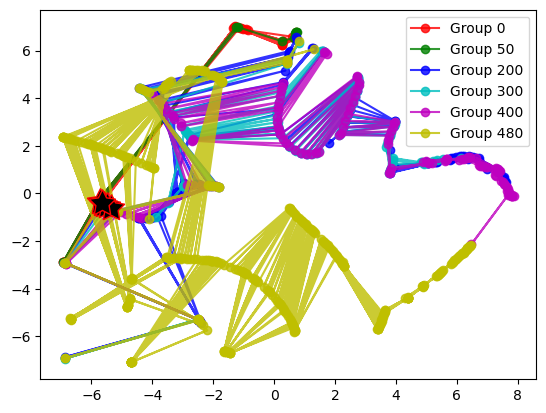

In [51]:
X = tsne_embeddings_with_labels[:,2]
Y = tsne_embeddings_with_labels[:,3]
Group = tsne_embeddings_with_labels[:,0].astype(int)

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'purple', 'orange', 'pink', 'brown']


for i, group_id in enumerate(np.unique(Group)):
    mask = (Group == group_id)
    plt.plot(X[mask], Y[mask],'-o', label=f'Group {group_id}', color=colors[i], alpha=0.8)

#start points
for point in tsne_embeddings_with_labels[tsne_embeddings_with_labels[:,1]==0]:
    plt.plot(point[2], point[3], color='red', mfc='black', marker=(5, 1), markersize=20)

plt.legend()
plt.show()

## UMAP Visualization

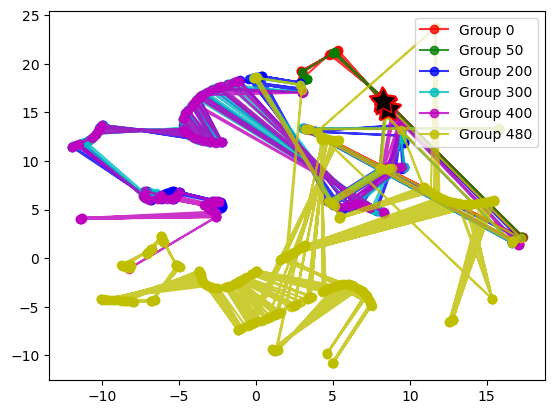

In [56]:
X = umap_embeddings_with_labels[:,2]
Y = umap_embeddings_with_labels[:,3]
Group = umap_embeddings_with_labels[:,0].astype(int)

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'purple', 'orange', 'pink', 'brown']


for i, group_id in enumerate(np.unique(Group)):
    mask = (Group == group_id)
    plt.plot(X[mask], Y[mask],'-o', label=f'Group {group_id}', color=colors[i], alpha=0.8)

#start points
for point in umap_embeddings_with_labels[umap_embeddings_with_labels[:,1]==0]:
    plt.plot(point[2], point[3], color='red', mfc='black', marker=(5, 1), markersize=20)

plt.legend()
plt.show()

## MDS Visualization

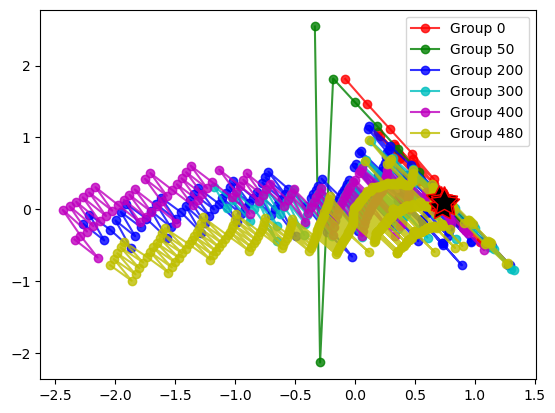

In [57]:
Y = mds_embeddings_with_labels[:,3]
X = mds_embeddings_with_labels[:,2]
Group = mds_embeddings_with_labels[:,0].astype(int)

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'purple', 'orange', 'pink', 'brown']


for i, group_id in enumerate(np.unique(Group)):
    mask = (Group == group_id)
    plt.plot(X[mask], Y[mask],'-o', label=f'Group {group_id}', color=colors[i], alpha=0.8)

#start points
for point in mds_embeddings_with_labels[mds_embeddings_with_labels[:,1]==0]:
    plt.plot(point[2], point[3], color='red', mfc='black', marker=(5, 1), markersize=20)

plt.legend()
plt.show()

## PCA Visualization

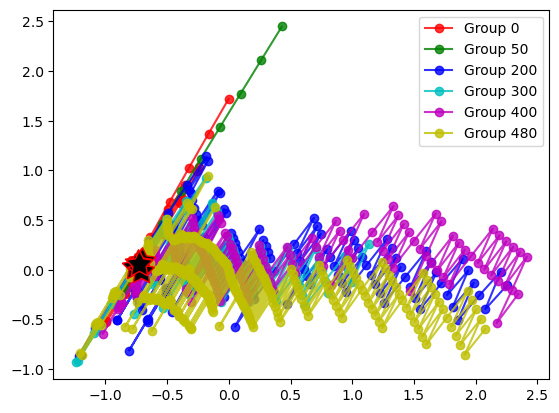

In [58]:
X = pca_embeddings_with_labels[:,2]
Y = pca_embeddings_with_labels[:,3]
Group = pca_embeddings_with_labels[:,0].astype(int)

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'purple', 'orange', 'pink', 'brown']


for i, group_id in enumerate(np.unique(Group)):
    mask = (Group == group_id)
    plt.plot(X[mask], Y[mask],'-o', label=f'Group {group_id}', color=colors[i], alpha=0.8)

#start points
for point in pca_embeddings_with_labels[pca_embeddings_with_labels[:,1]==0]:
    plt.plot(point[2], point[3], color='red', mfc='black', marker=(5, 1), markersize=20)

plt.legend()
plt.show()

### Meta Data Encoding 
Encode addtional features in the visualization.

Use features of the source data and include them in the projection, e.g., by using color, opacity, different shapes, or line styles, etc.

In [ ]:
# WE ALREADY DID THIS IN THE PREVIOUS STEP

### Comments
- Which features did you use? Why?
    - We used the diffrent episodes and the labels show the episode number in order to visualize earlier and later runs (from an untrained to a trained agent). The higher the Group Number the better the agent.
    - We also used the start points to show where the agent started. (all at a similar point - e.g. in the middle of the field)
- How are the features encoded?
    - We used color to encode the episode numbers.
    - We used star shaped dots to plot the starting positions.

## Optional
<details>
    <summary><a>Projection Space Explorer (click to reveal)</a></summary>

    
<h2>Projection Space Explorer</h2>

The <a href="https://jku-vds-lab.at/pse/">Projection Space Explorer</a> is a web application to plot and connect two dimensional points. 
Metadata of the data points can be used to encode additonal information into the projection, e.g., by using different shapes or colors.
    
Further Information:
<ul>
    <li>Paper: <a href="https://jku-vds-lab.at/publications/2020_tiis_pathexplorer/">https://jku-vds-lab.at/publications/2020_tiis_pathexplorer/</a>
    <li>Repo: <a href="https://github.com/jku-vds-lab/projection-space-explorer/">https://github.com/jku-vds-lab/projection-space-explorer/</a>
    <li>Application Overview: <a href="https://jku-vds-lab.at/pse/">https://jku-vds-lab.at/pse/</a>
</ul>

<h3>Data Format</h3>
How to format the data can be found in the <a href="https://github.com/jku-vds-lab/projection-space-explorer/#data-format">Projection Space Explorer's README</a>.

Example data with three lines, with two colors (algo) and additional mark encoding (cp):

<table>
<thead>
  <tr>
    <th>x</th>
    <th>y</th>
    <th>line</th>
    <th>cp</th>
    <th>algo</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>0.0</td>
    <td>0</td>
    <td>0</td>
    <td>start</td>
    <td>1</td>
  </tr>
  <tr>
    <td>2.0</td>
    <td>1</td>
    <td>0</td>
    <td>state</td>
    <td>1</td>
  </tr>
  <tr>
    <td>4.0</td>
    <td>4</td>
    <td>0</td>
    <td>state</td>
    <td>1</td>
  </tr>
  <tr>
    <td>6.0</td>
    <td>1</td>
    <td>0</td>
    <td>state</td>
    <td>1</td>
  </tr>
  <tr>
    <td>8.0</td>
    <td>0</td>
    <td>0</td>
    <td>state</td>
    <td>1</td>
  </tr>
  <tr>
    <td>12.0</td>
    <td>0</td>
    <td>0</td>
    <td>end</td>
    <td>1</td>
  </tr>
  <tr>
    <td>-1.0</td>
    <td>10</td>
    <td>1</td>
    <td>start</td>
    <td>2</td>
  </tr>
  <tr>
    <td>0.5</td>
    <td>5</td>
    <td>1</td>
    <td>state</td>
    <td>2</td>
  </tr>
  <tr>
    <td>2.0</td>
    <td>3</td>
    <td>1</td>
    <td>state</td>
    <td>2</td>
  </tr>
  <tr>
    <td>3.5</td>
    <td>0</td>
    <td>1</td>
    <td>state</td>
    <td>2</td>
  </tr>
  <tr>
    <td>5.0</td>
    <td>3</td>
    <td>1</td>
    <td>state</td>
    <td>2</td>
  </tr>
  <tr>
    <td>6.5</td>
    <td>5</td>
    <td>1</td>
    <td>state</td>
    <td>2</td>
  </tr>
  <tr>
    <td>8.0</td>
    <td>10</td>
    <td>1</td>
    <td>end</td>
    <td>2</td>
  </tr>
  <tr>
    <td>3.0</td>
    <td>6</td>
    <td>2</td>
    <td>start</td>
    <td>2</td>
  </tr>
  <tr>
    <td>2.0</td>
    <td>7</td>
    <td>2</td>
    <td>end</td>
    <td>2</td>
  </tr>
</tbody>
</table>



Save the dataset to CSV, e.g. using pandas: <tt>df.to_csv('data_path_explorer.csv', encoding='utf-8', index=False)</tt>  
    and upload it in the Projection Space Explorer by clicking on `OPEN FILE` in the top left corner.
    
ℹ You can also include your high dimensionmal data and use it to adapt the visualization.
    
</details>


## Results
You may add additional screenshots of the Projection Space Explorer.

<div>
    <p>TSNE</p>
    <img src="data//tsne_plot.png" width="600"/>
</div>
<div>
    <p>UMAP</p>
    <img src="data//umap_plot.png" width="600"/>
</div>
<div>
    <p>MDS</p>
    <img src="data//mds_plot.png" width="600"/>
</div>
<div>
    <p>PCA</p>
    <img src="data//pca_plot.png" width="600"/>
</div>

### Interpretion
- What can be seen in the projection(s)?
  In the projections we can see different patterns. 
    - In the t-SNE and UMAP projections we can see local sturctures, which are different for good and really good episodes. The yellow one is the best episode, where the agent has already learned to balance the pole for the maximum of 500 update steps. It takes a completely different route than the other episodes.
    - In the MDS and PCA projections we can see global structures, that reflect a "horizontal is good" structure.
    - The first runs (episodes 0-50) go far out in one direction and the better one oscillate around a horizontal line. in MDS from right to left and in PCA from left to right. Here we can see a lot of these local oscillating structures.
- Was it what you expected? If not what did you expect?
    - We expected more compact structres for the good runs and more spread out structures for the bad runs. 
- Can you confirm prior hypotheses from the projection?
    - Our hypothis that a better episode has a compact local structure was not confirmed, in t-SNE and UMAP we can see different paths for good and really good episodes. However, they both move around.
- Did you get any unexpected insights? 
    - We did not expect that t-SNE and UMAP would seperate good from really good agents and that MDS and PCA would just show a simple horizontal structre where good agents are separated from bad ones. But it is harder to tell that the yellow one is the best one in MDS and PCA. 

## Submission
When you’ve finished working on this assignment please download this notebook as HTML and add it to your repository in addition to the notebook file.